In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [7]:
df.shape

(30, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Conlusion-
1.There are 17 feartures in which 1 is float type and remaining are integer.
2.There are No null values are present in tha dataset
3.Total records avaible are 30

In [10]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [11]:
# There are no null values in the dataset.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [13]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Conclusion-
The acceptable range for skewness is between +/-0.5. Columns such as Runs Scored, Hits, Runs Average, Earned Runs, Earned Run Average, Complete Game, Saves and Errors being slightly out of this range.

In [15]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [17]:
# The Target variable is W
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [76]:
df.CG.unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

The problem is a Regression problem so the prediction will be one  the total number of wins by a team.

<AxesSubplot:xlabel='W', ylabel='Density'>

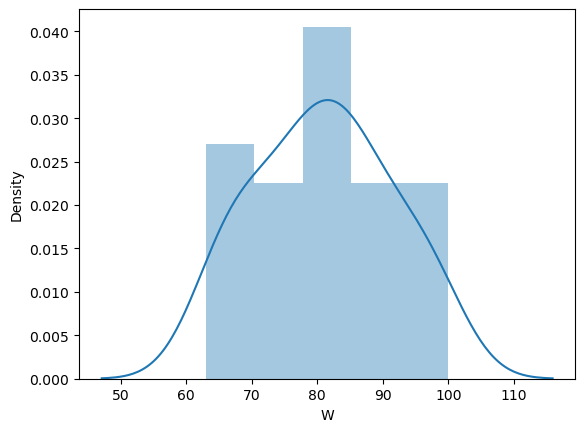

In [18]:
# Analysis of  Target Variable.
sns.distplot(df.W)

In [19]:
# The distribution is a normal distribution.

<AxesSubplot:xlabel='W', ylabel='Count'>

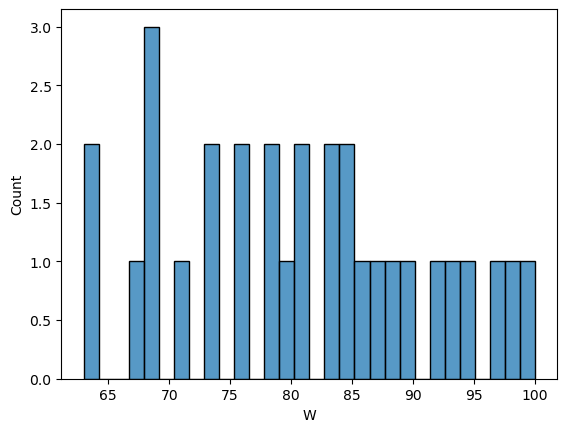

In [20]:
sns.histplot(df.W, bins=30)

In [21]:
# The Wins depends on various features so have to find the relation between the related feartures.

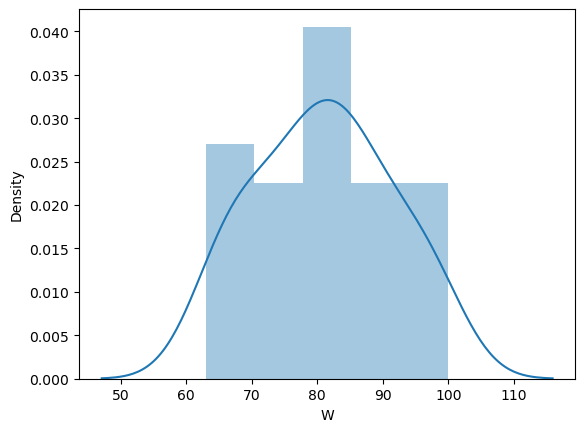

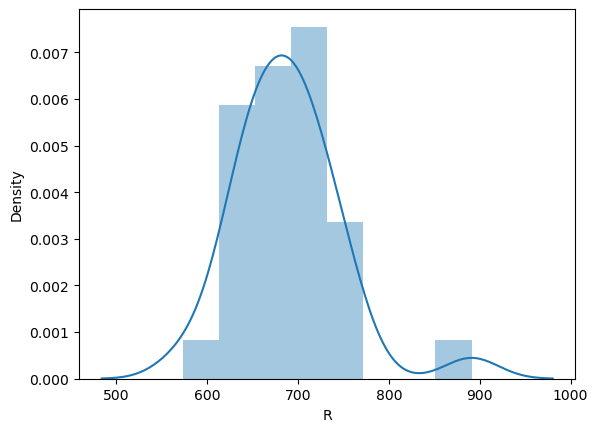

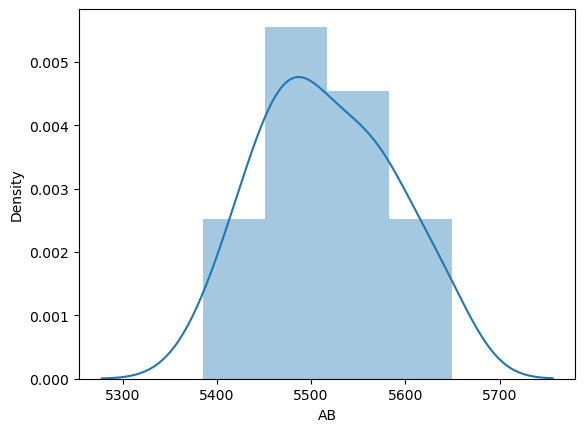

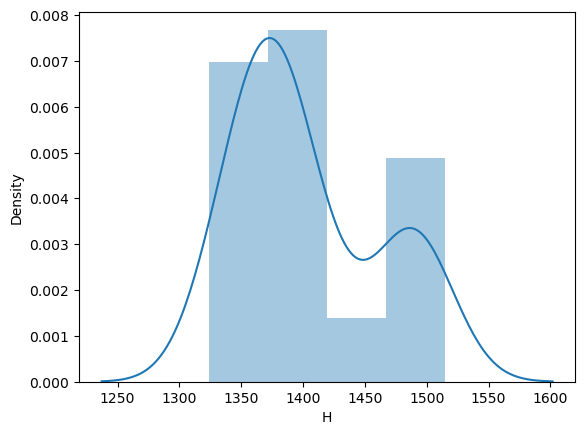

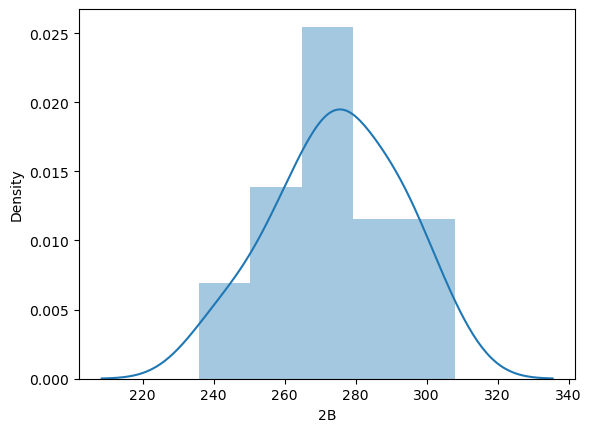

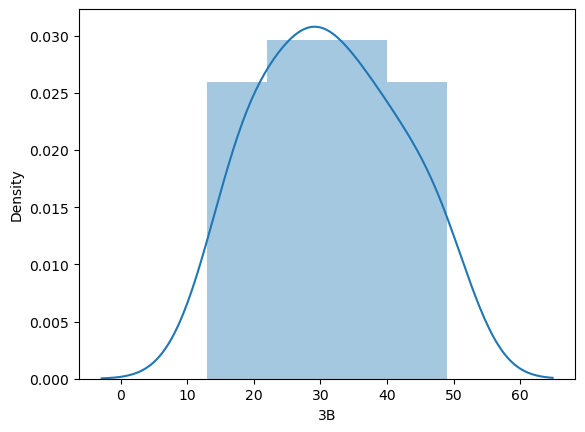

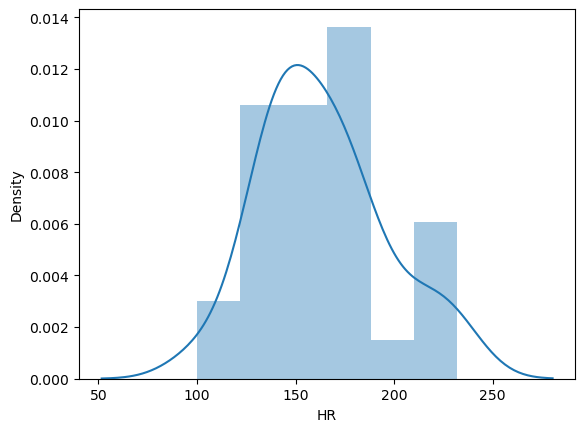

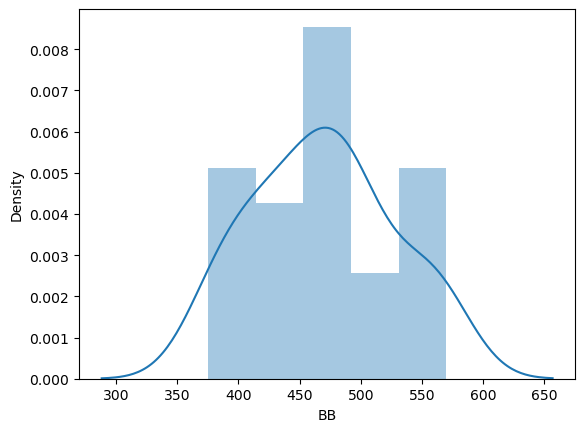

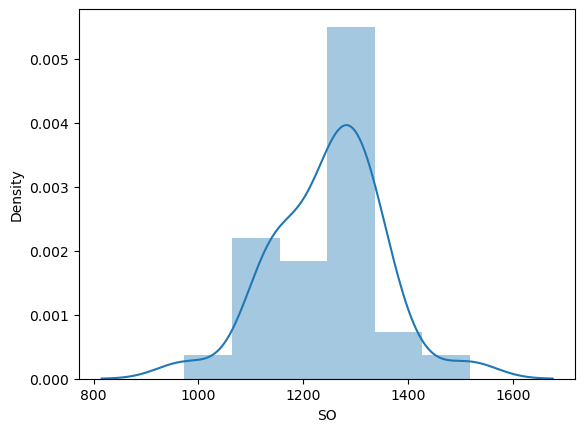

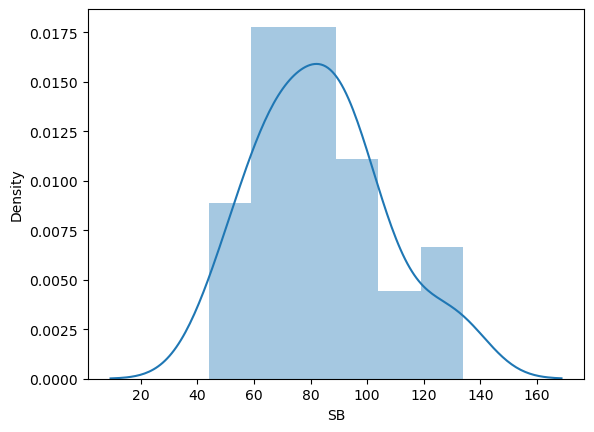

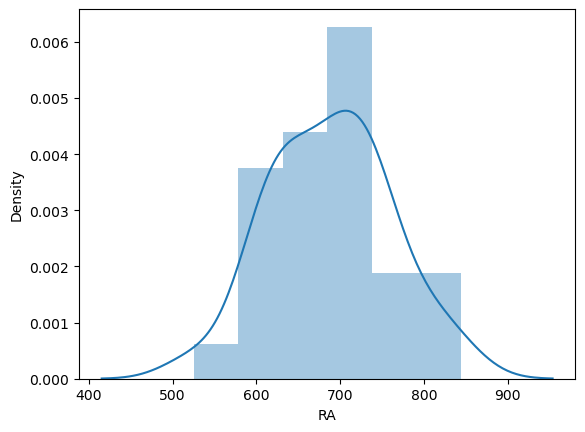

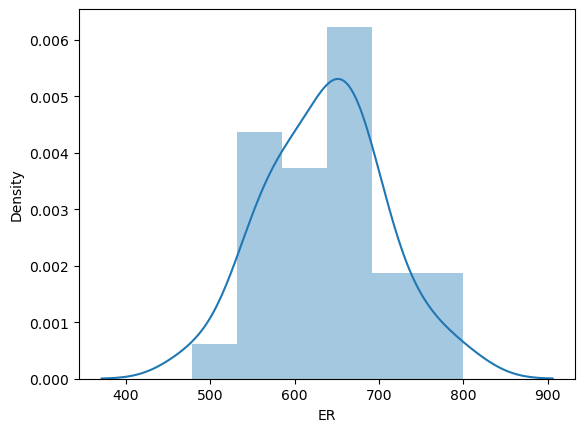

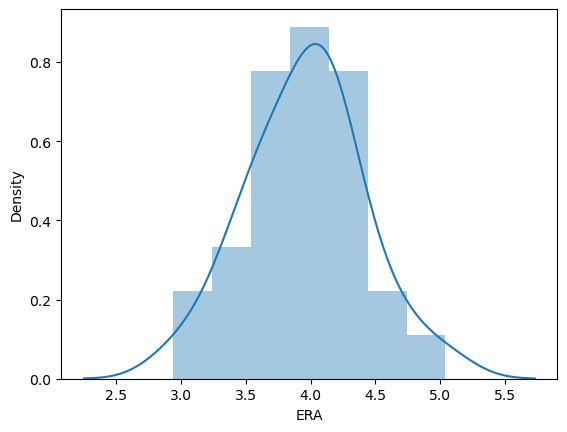

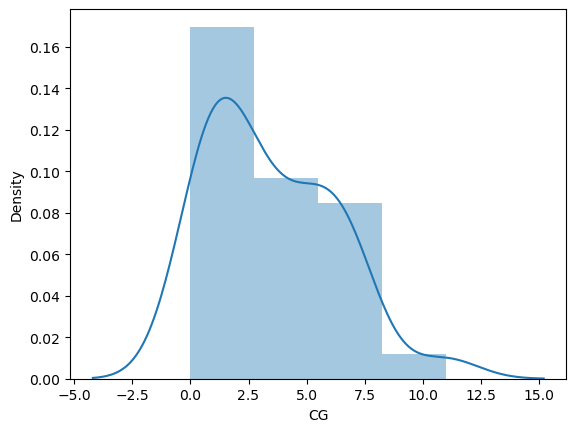

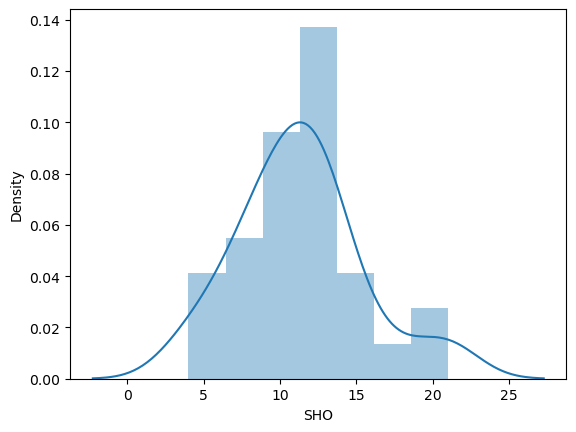

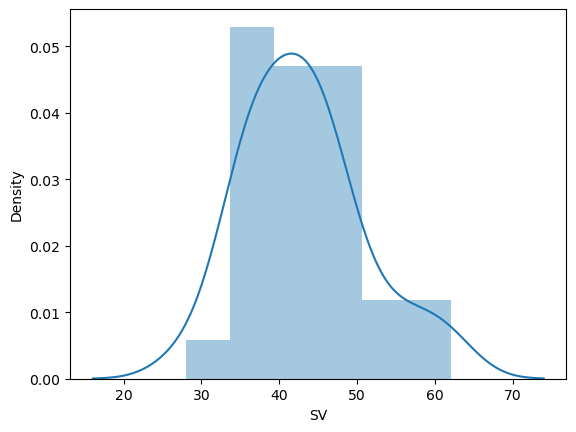

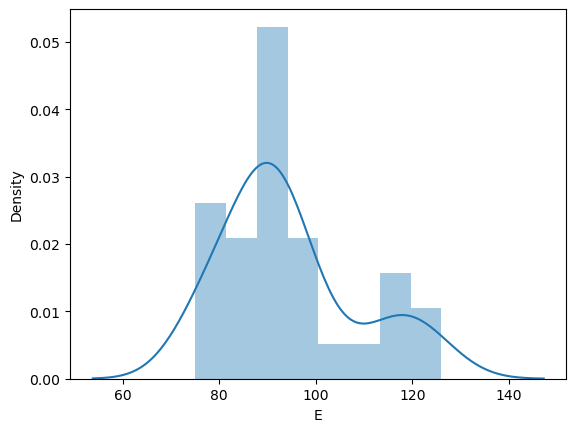

In [22]:
# Distribution of all features.

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [23]:
# R  -  is right skewed data and 2 peaks
# AB  - kinf od normal distribution
# H - Bipolar distributed data
#2B  - lil bit left skewed data
#3B  - kind of normal distribution
# HR - some skewness on both side
#BB  - also have sort of skewness on both side
# SO  - skewed data on both sides
#SB right side skewed
#RA - skewed data
# ER  - lil skewed data
# ERA - Skewed on both side
# CG - not normal distributed data
#  SHO= not noprmal distributed
#SV - right skewed
#E Bipolar data

<AxesSubplot:xlabel='R', ylabel='W'>

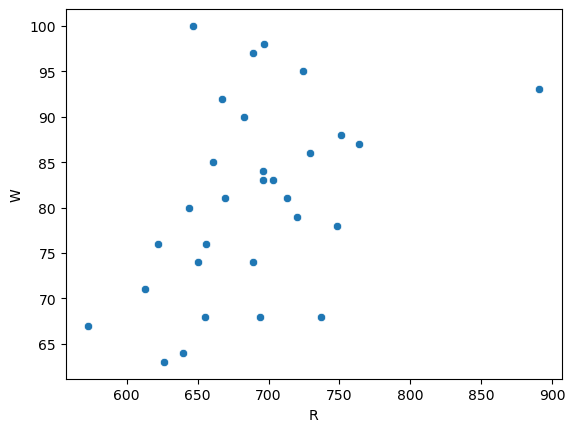

In [44]:
#Runs scored vs Win
sns.scatterplot(x="R",y="W",data=df)

In [46]:
# Run scored have positive correlation with Wins . can be described as more the run, more chances to WIN.

<AxesSubplot:xlabel='AB', ylabel='W'>

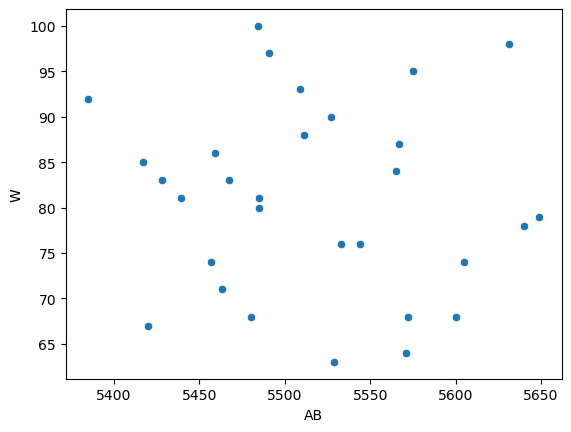

In [47]:
# AB vs Win
sns.scatterplot(x="AB",y="W",data=df)

In [ ]:
# Data is distributed everywhere it is not in one direction, it is low correlatesd .

<AxesSubplot:xlabel='H', ylabel='W'>

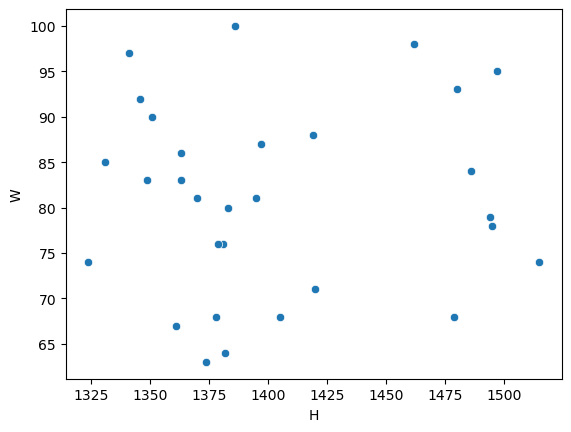

In [48]:
# H vs win
sns.scatterplot(x="H",y="W",data=df)

In [49]:
# Data distribution is low correlated.

<AxesSubplot:xlabel='2B', ylabel='W'>

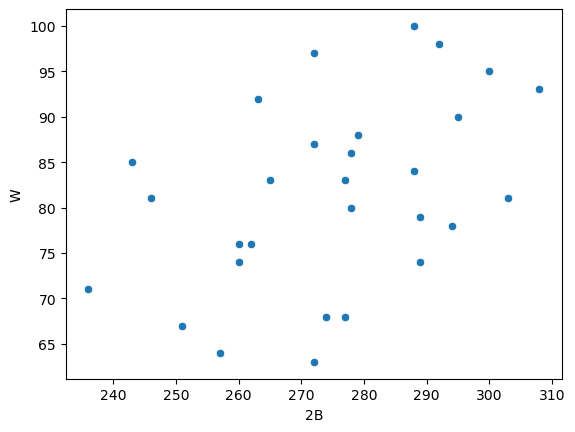

In [57]:
#  2B vs WIN

sns.scatterplot('2B','W',data=df)

In [58]:
# Data is Positively correlated . More 2B there are more chances to win.

<AxesSubplot:xlabel='3B', ylabel='W'>

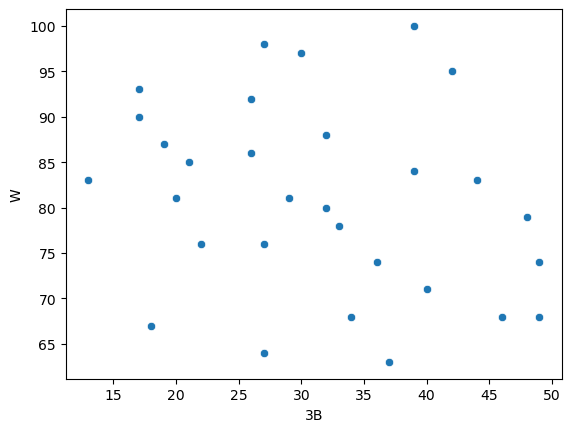

In [59]:
# 3B vs WIN

sns.scatterplot('3B','W',data=df)

In [60]:
# The distribution is low correlated this will not  help to predict WIN 

<AxesSubplot:xlabel='HR', ylabel='W'>

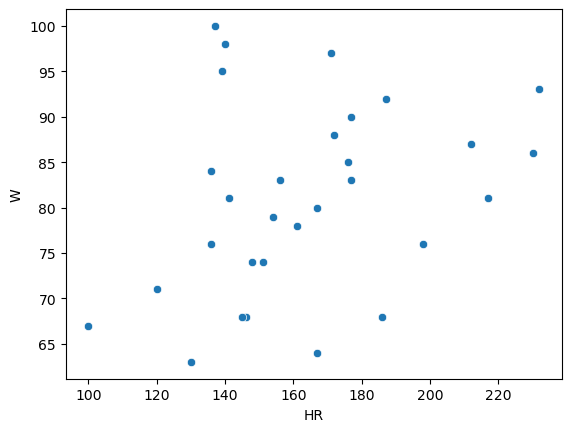

In [62]:
#HR vs WIN

sns.scatterplot('HR','W',data=df)

In [63]:
# The graph is Positively correlated

<AxesSubplot:xlabel='BB', ylabel='W'>

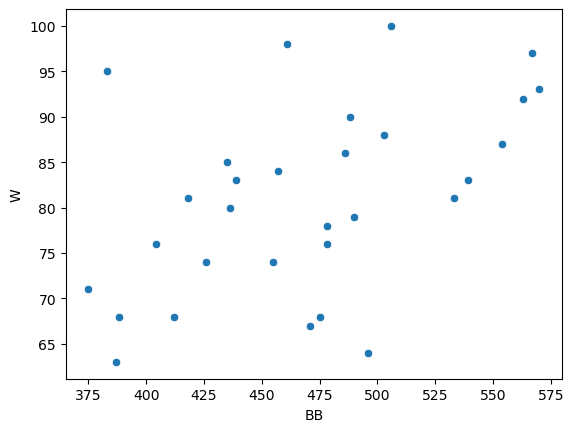

In [64]:
# BB vs win
sns.scatterplot('BB','W',data=df)

In [65]:
# The data in graph is positively correlated.

<AxesSubplot:xlabel='SO', ylabel='W'>

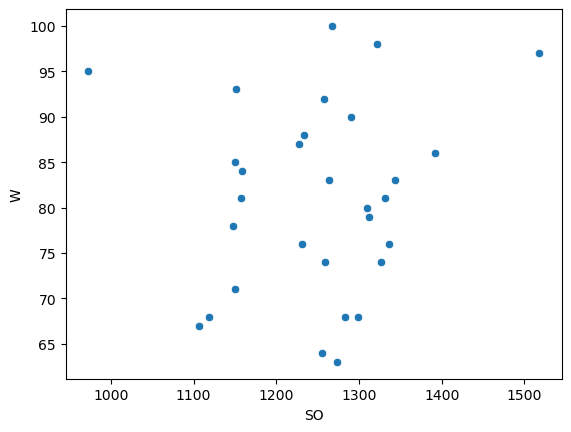

In [66]:
# SO vs WIN

sns.scatterplot('SO','W',data=df)

In [67]:
# The data is low positive correlated.

<AxesSubplot:xlabel='SB', ylabel='W'>

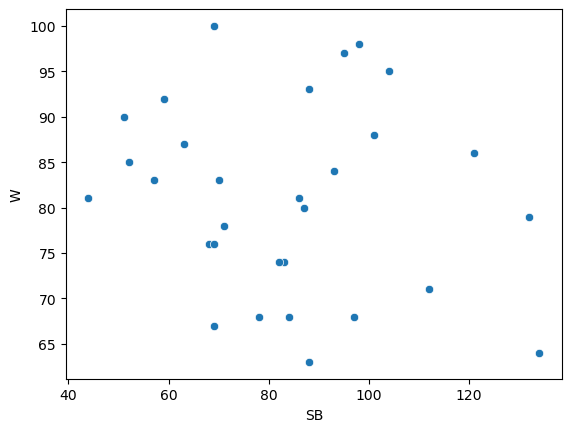

In [50]:
# SB vs WIN
sns.scatterplot(x="SB",y="W",data=df)

In [53]:
#The graph is negative low correlated

<AxesSubplot:xlabel='RA', ylabel='W'>

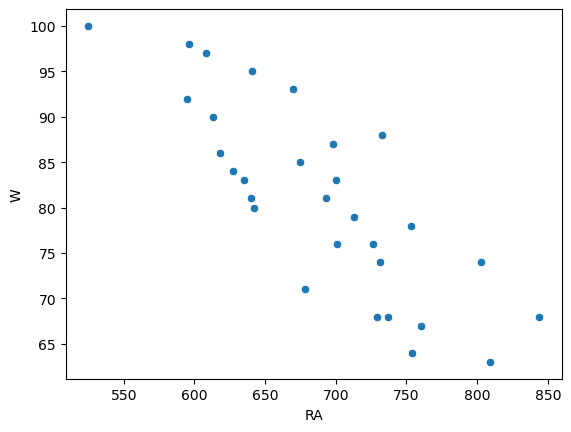

In [68]:
# RA vs win

sns.scatterplot('RA','W',data=df)

In [69]:
# Highly negative correlated

<AxesSubplot:xlabel='ER', ylabel='W'>

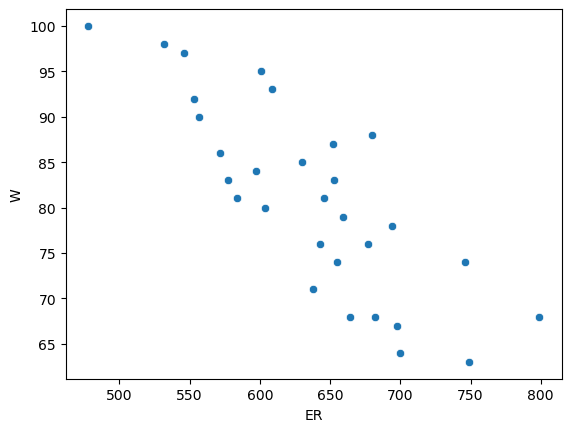

In [70]:
# ER vs Win

sns.scatterplot('ER','W',data=df)

In [71]:
#Highly negative correlated

<AxesSubplot:xlabel='ERA', ylabel='W'>

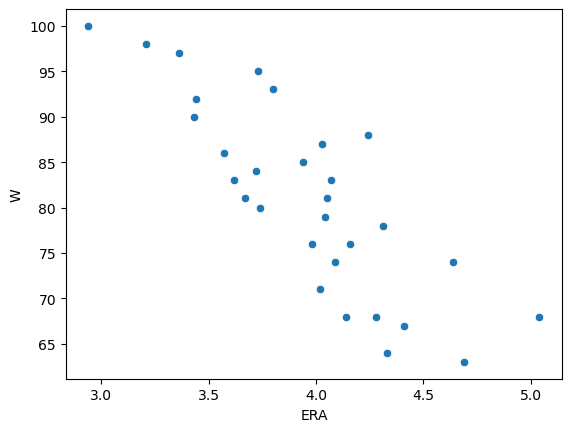

In [54]:
# ERA vs WINS
sns.scatterplot(x="ERA",y="W",data=df)

In [56]:
# Highly negative correlated data.

<AxesSubplot:xlabel='CG', ylabel='W'>

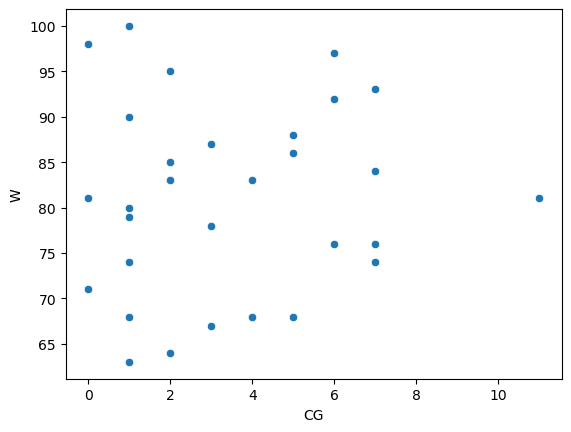

In [72]:
# CG vs WIN

sns.scatterplot('CG','W',data=df)

In [73]:
# The data is Very low correlated.

<AxesSubplot:xlabel='SHO', ylabel='W'>

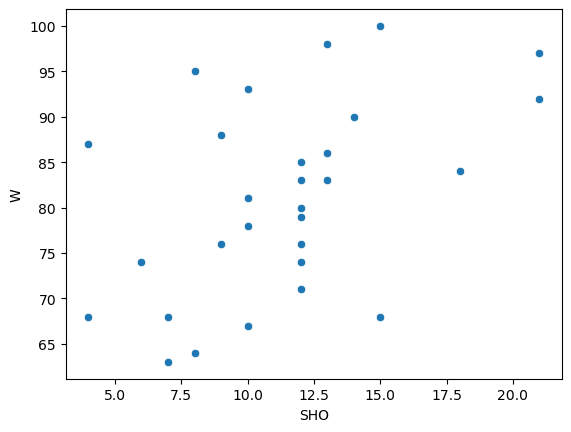

In [74]:
# SHO vs win

sns.scatterplot('SHO','W',data=df)

In [ ]:
# The graph is positively correlated.

<AxesSubplot:xlabel='SV', ylabel='W'>

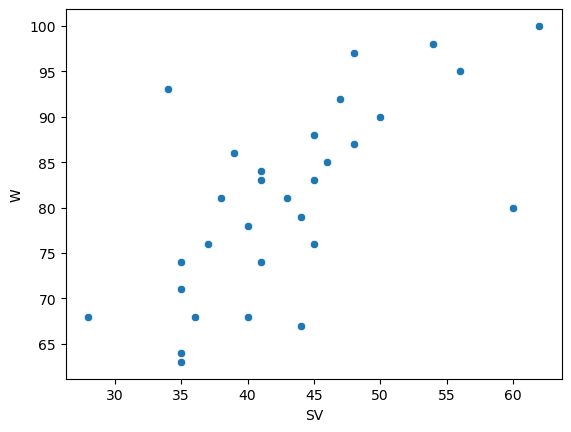

In [55]:
# SV vs win
sns.scatterplot(x="SV",y="W",data=df)

In [ ]:
# The data is positively correlated.

<AxesSubplot:xlabel='E', ylabel='W'>

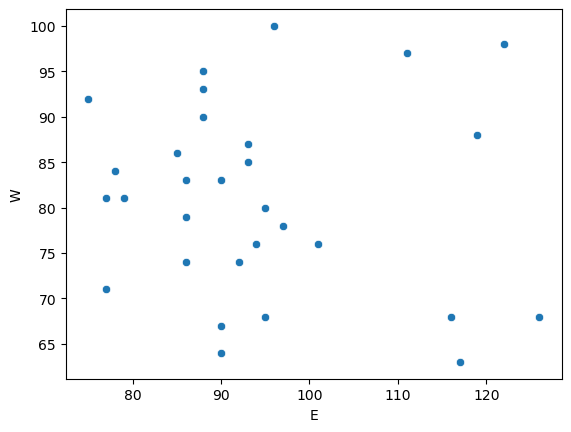

In [37]:
# E vs WINS
sns.scatterplot(x="E",y="W",data=df)

In [ ]:
# The very low correlated data. 

<AxesSubplot:xlabel='R', ylabel='W'>

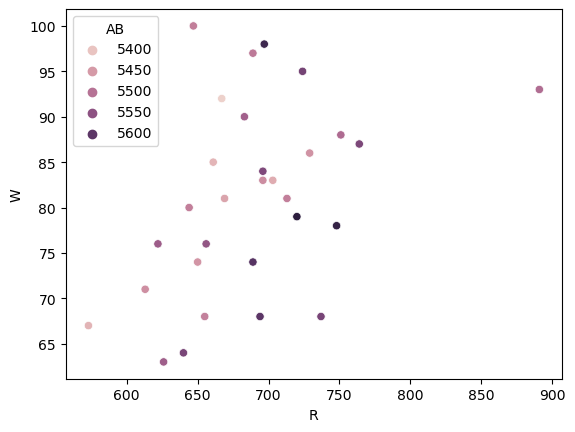

In [75]:
sns.scatterplot('R','W',hue='AB',data=df)  # AB- At bats

Conclusion-
1.Many of the variables had a decent linear with wins. ERA looks to have the highest negative correlation with wins and On-base Percentage looks to have the highest positive correlation.
2.Within features some are very low correlated with target variable and some are highly negative correlated.
3.Multicolinearity is also available, some independent feature are highly correlated to each other

In [77]:
df.CG.unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

<AxesSubplot:xlabel='R', ylabel='W'>

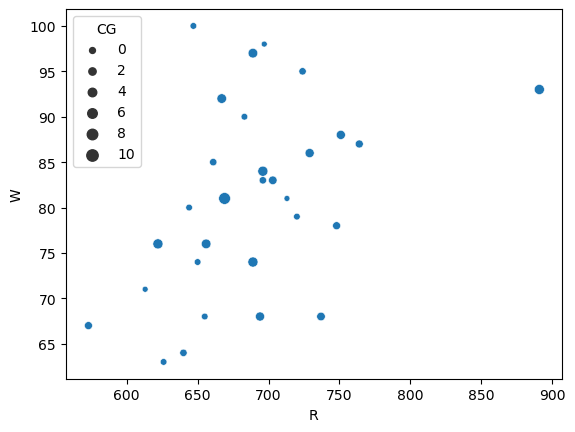

In [78]:
sns.scatterplot('R','W',size='CG',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

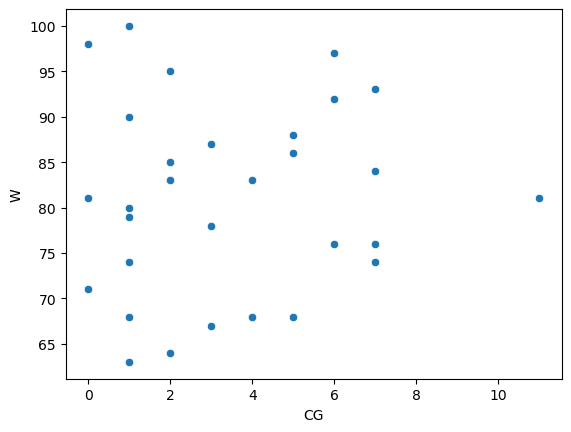

In [79]:
sns.scatterplot('CG','W',data=df)

In [80]:
# Complete Game has no correlation with WIN there may a chances where the game has been played completely and not won all series matches

<AxesSubplot:xlabel='ER', ylabel='RA'>

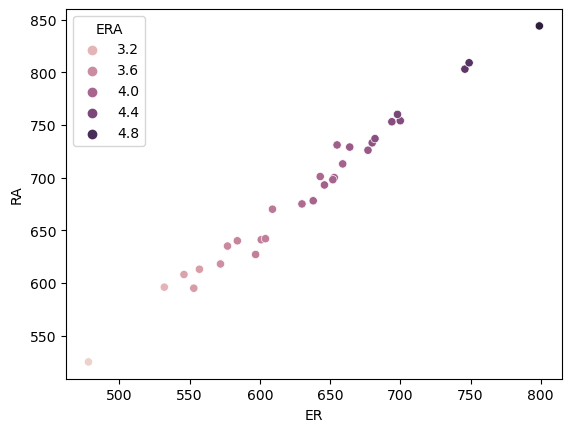

In [81]:
sns.scatterplot('ER', 'RA', hue='ERA',data=df)

In [82]:
#RA - Opponents runs scored
#ER - Earned runs allowed
#ERA - Earned run average
# Earned runs is the key counting statistic used in ERA, the most widely accepted barometer of a pitcher's success. If there are no errors or passed balls in a given inning or game, all the runs in that inning or game are earned runs.
# RA and ER seems the same thing menas, RA - run scored by opponent and ER earned run allowed without any errors.
# It have a good correlation

<AxesSubplot:>

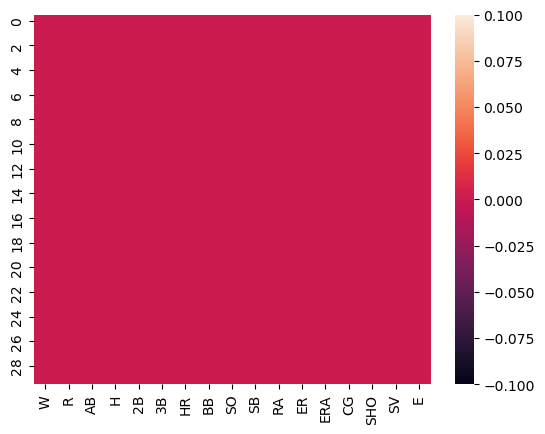

In [24]:
sns.heatmap(df.isna())

<AxesSubplot:>

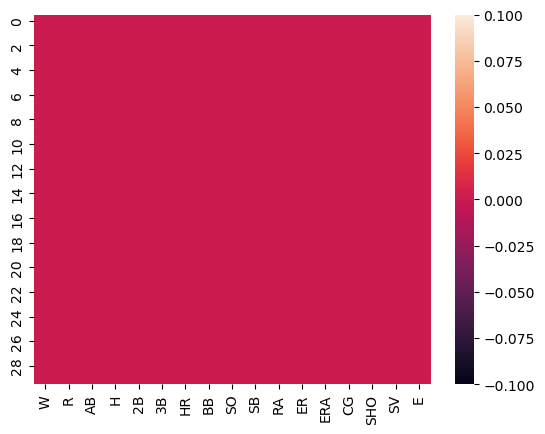

In [25]:
sns.heatmap(df.isnull())

Correlation()

In [38]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [39]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [40]:
df=df[[ 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E','W']]

<AxesSubplot:>

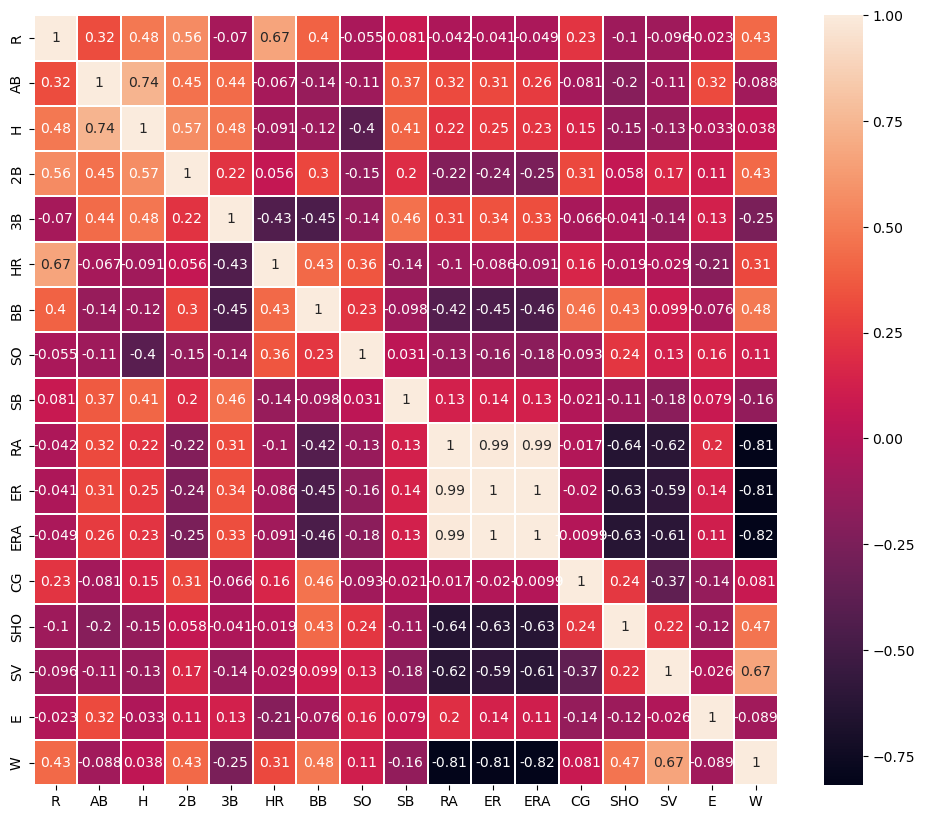

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

In [43]:
# Correlation analysis, First independent vs dependent

# R,HR,2B,BB,SHO, SV  is good correlated with target variable (W)

# AB, H, 3B, SO,SB,CG,E  are low correlated with target variable (+ and -)

# RA, ER, ERA  are highly negative correlated, have to further check to drop any of them.

# RA, ER, ERA  are highly correlated to each other. these feature can bios the result. we have to take decicion on them.

# AB and H are strong correlated to each other 74%

In [84]:
v= df.drop('W', axis=1)
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [86]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(v)

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
VIF= pd.DataFrame()
VIF['features']=v.columns

In [88]:
VIF['vif']= [variance_inflation_factor(scaled,i)
             for i in range(len(v.columns))]

In [89]:
VIF

,features,vif
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


In [90]:
# Many features have more than 5 VIF.Delete feature 'ER'

In [93]:
v= df.drop(['ER','W'], axis=1)

In [94]:
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86


In [95]:
scaled=sc.fit_transform(v)

In [96]:
VIF2= pd.DataFrame()
VIF2['features']=v.columns

VIF2['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [97]:
VIF2

,features,vif
0,R,11.158733
1,AB,5.863764
2,H,9.628749
3,2B,3.786446
4,3B,3.293109
5,HR,9.057309
6,BB,3.791451
7,SO,2.607389
8,SB,1.849280
9,RA,122.133235


In [98]:
# Delete RA column

In [99]:
v= df.drop(['W','ER','RA'], axis=1)

In [100]:
scaled=sc.fit_transform(v)

In [101]:
VIF3= pd.DataFrame()
VIF3['features']=v.columns

VIF3['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF3

,features,vif
0,R,10.987898
1,AB,4.399954
2,H,8.941874
3,2B,3.729413
4,3B,3.142717
5,HR,7.882841
6,BB,3.468244
7,SO,2.155496
8,SB,1.819823
9,ERA,4.951981


In [102]:
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


<AxesSubplot:>

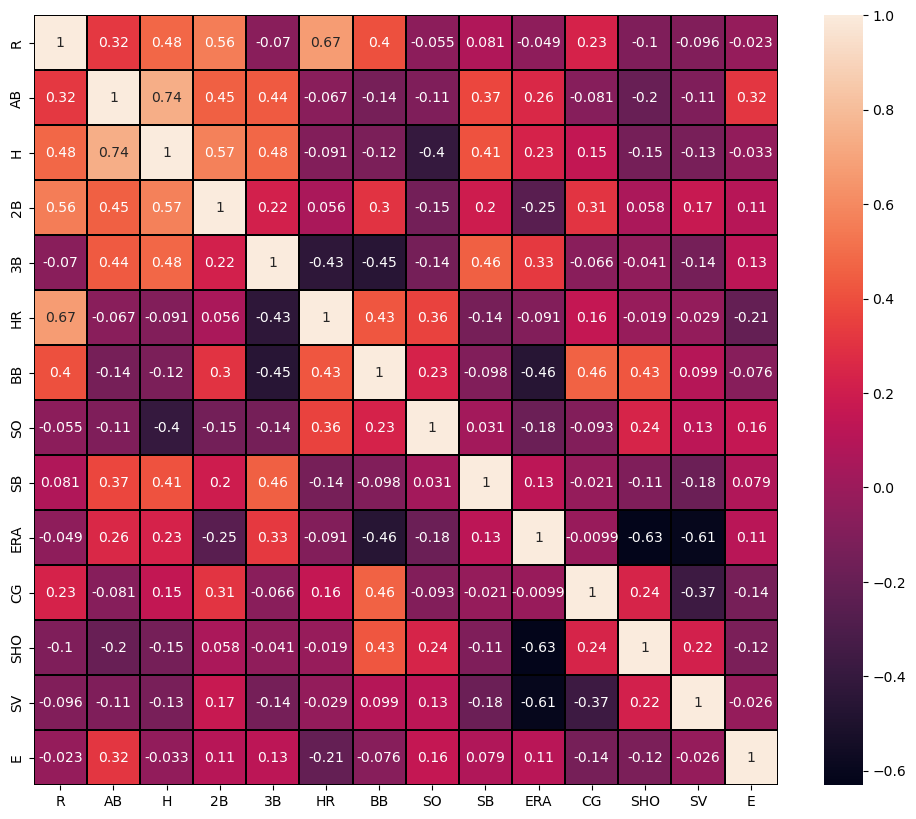

In [103]:
plt.figure(figsize=(12,10))
sns.heatmap(v.corr(), annot=True,linecolor='black', linewidths=.25)

In [104]:
# All the highly correlated features have been removed.

In [105]:
v.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [106]:
# outliers

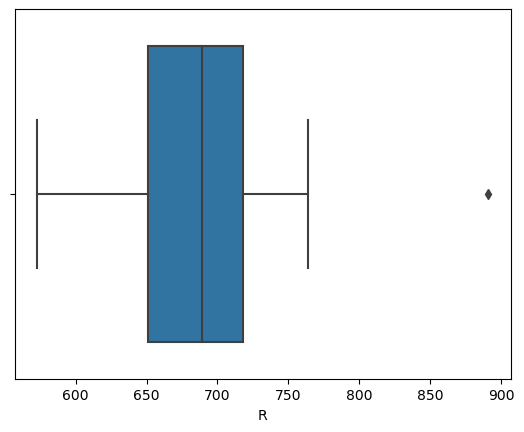

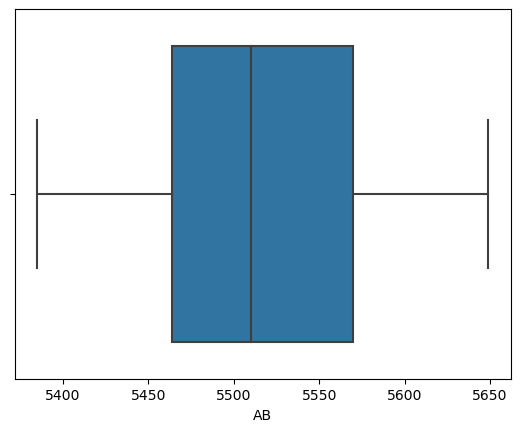

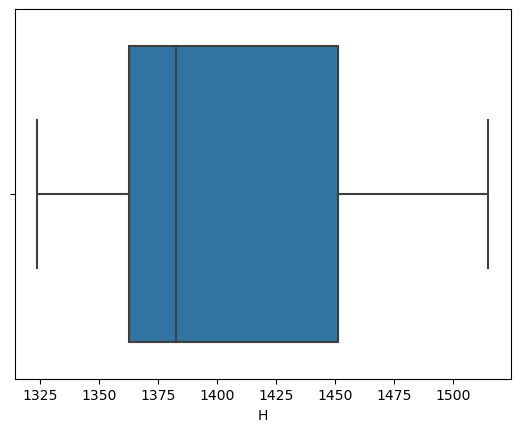

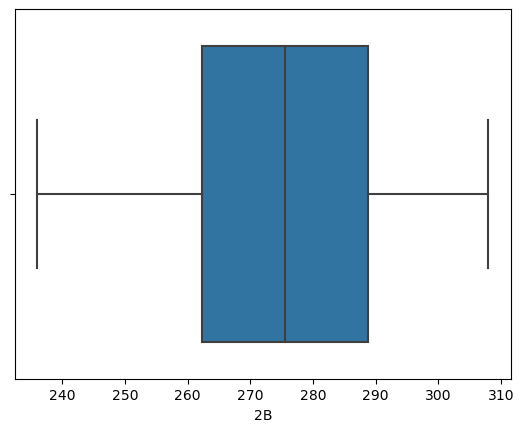

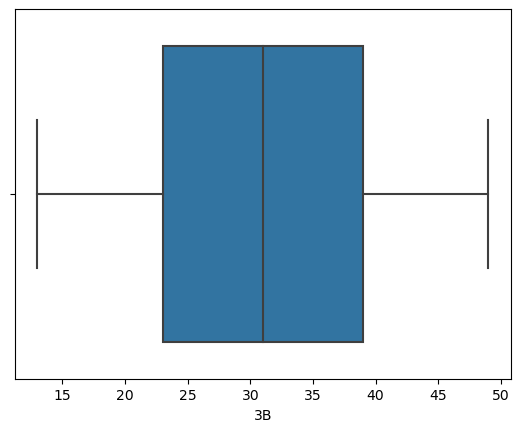

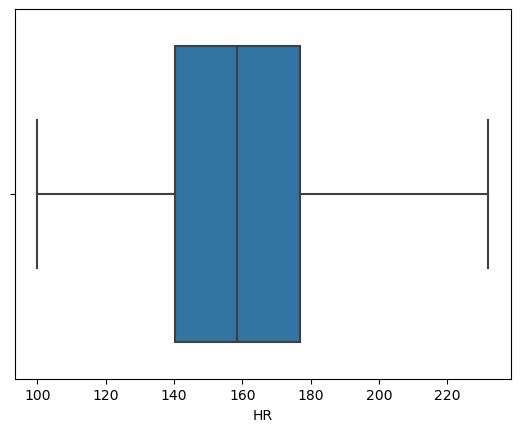

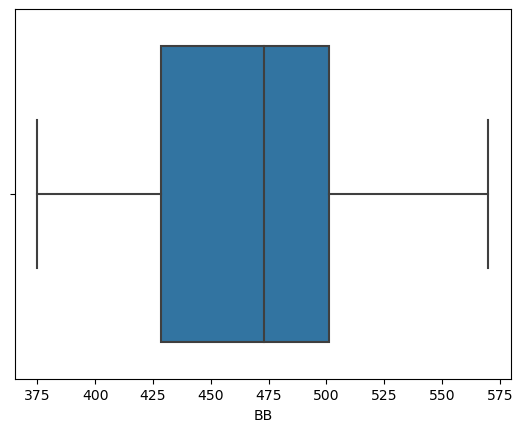

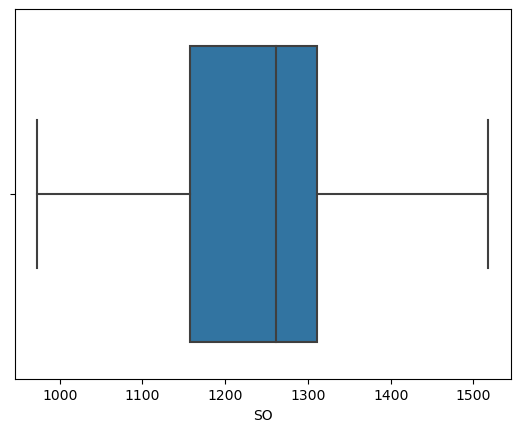

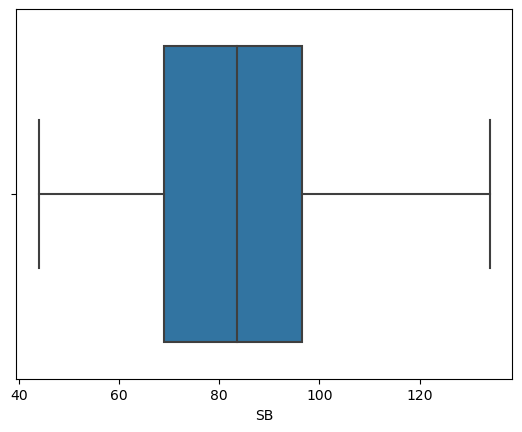

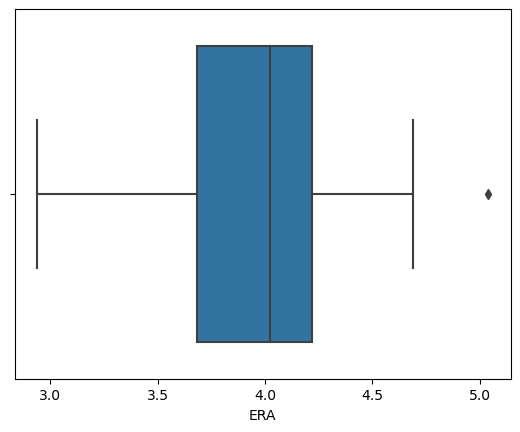

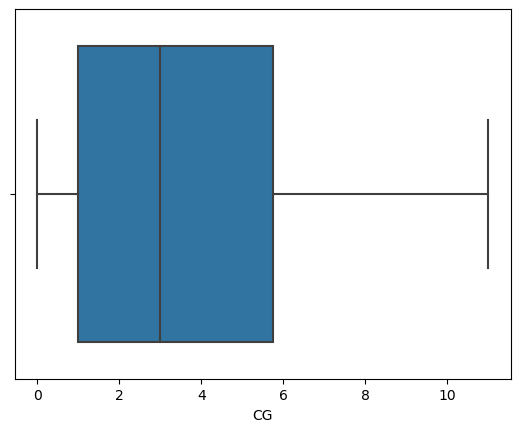

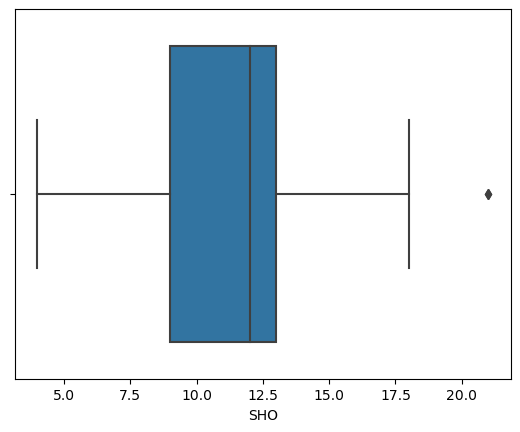

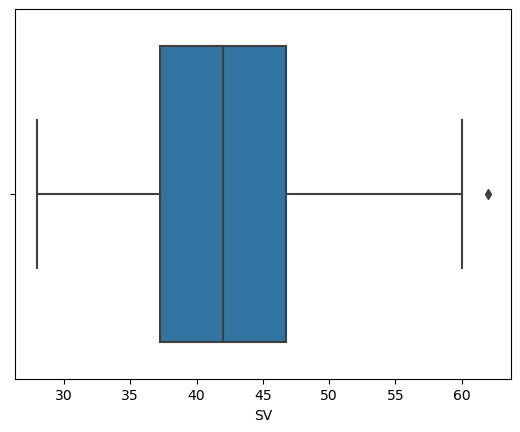

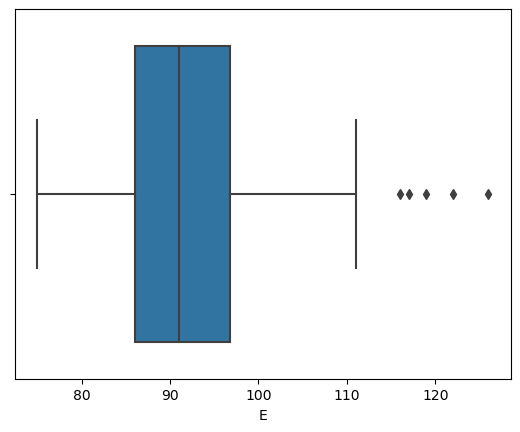

In [107]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [108]:
#Outliers are in upper range of features R , ERA , SHO , SV , E 

In [109]:
IQR= df['R'].quantile(.75)-df['R'].quantile(.25)
IQR
upper= df['R'].quantile(.75) +( 1.5 * IQR)
upper

818.75

In [110]:
v['R']= np.where(v['R']>upper,upper,v['R'])


IQR= df['ERA'].quantile(.75)-df['ERA'].quantile(.25)
IQR
upper= df['ERA'].quantile(.75) +( 1.5 * IQR)
upper
v['ERA']= np.where(v['ERA']>upper,upper,v['ERA'])

IQR= df['SHO'].quantile(.75)-df['SHO'].quantile(.25)
IQR
upper= df['SHO'].quantile(.75) +( 1.5 * IQR)
upper
v['SHO']= np.where(v['SHO']>upper,upper,v['SHO'])

IQR= df['SV'].quantile(.75)-df['SV'].quantile(.25)
IQR
upper= df['SV'].quantile(.75) +( 1.5 * IQR)
upper
v['SV']= np.where(v['SV']>upper,upper,v['SV'])

IQR= df['E'].quantile(.75)-df['E'].quantile(.25)
IQR
upper= df['E'].quantile(.75) +( 1.5 * IQR)
upper
v['E']= np.where(v['E']>upper,upper,v['E'])

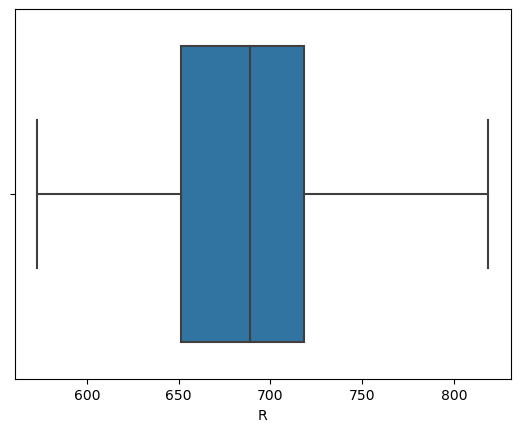

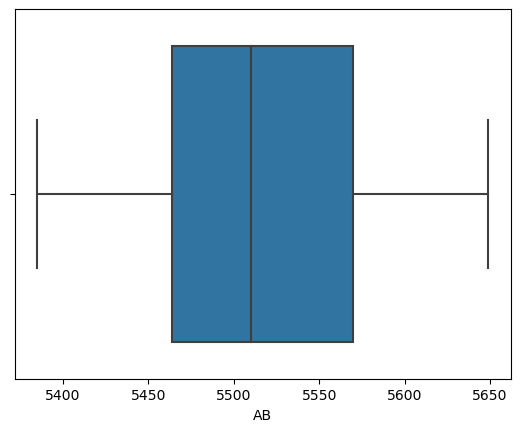

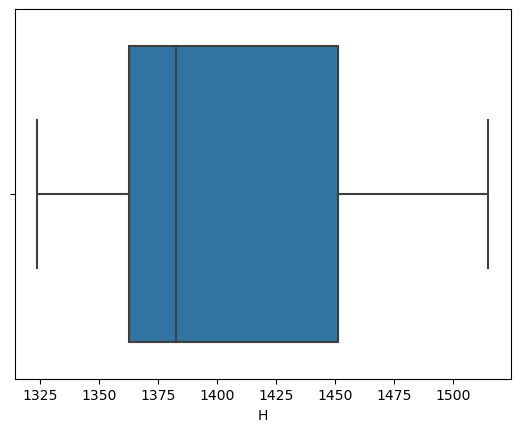

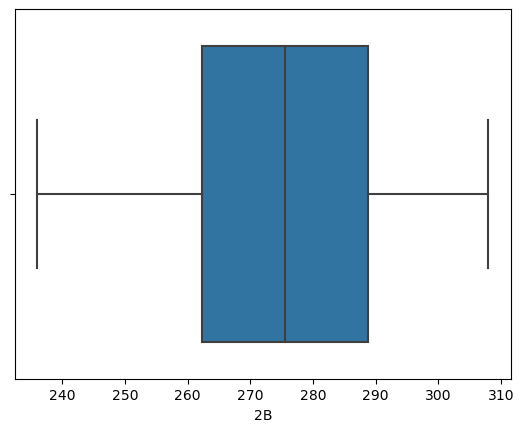

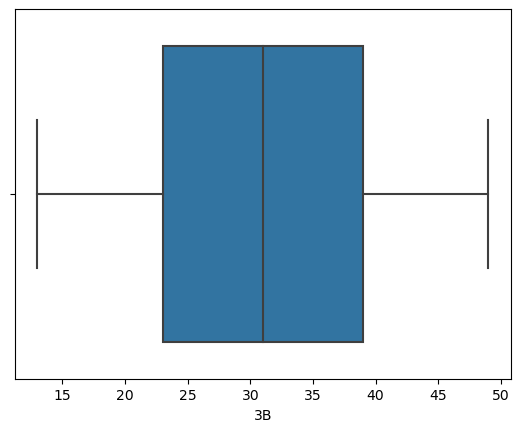

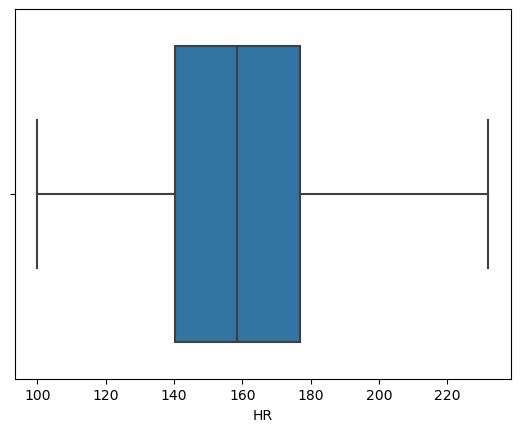

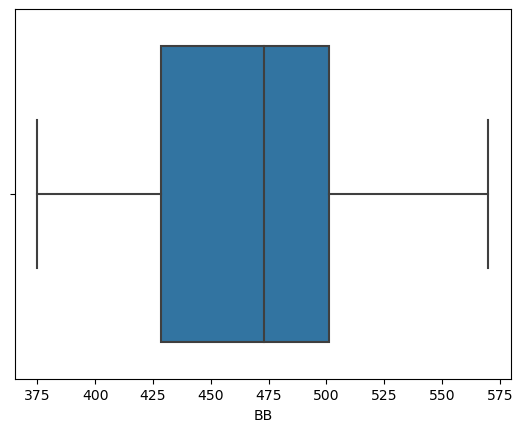

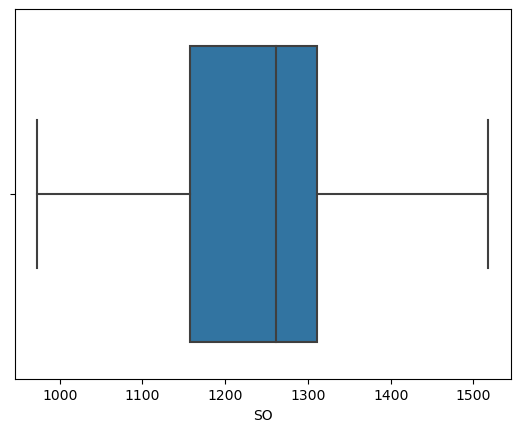

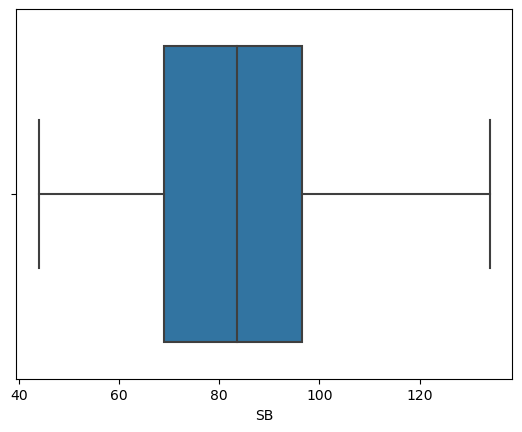

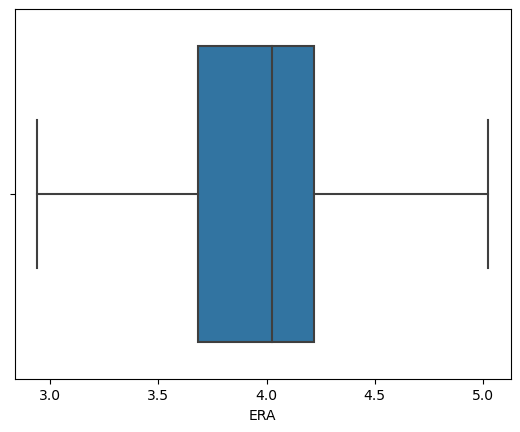

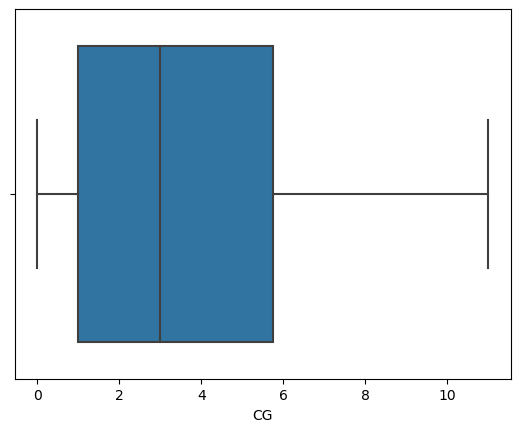

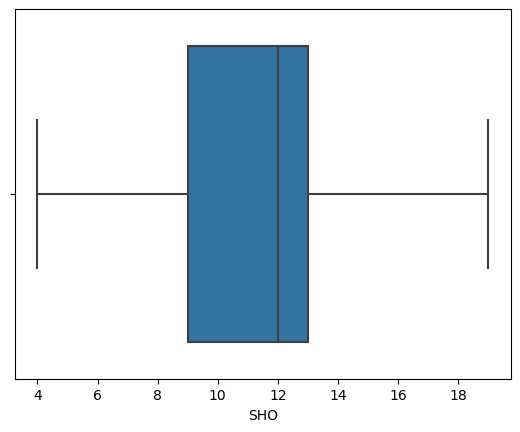

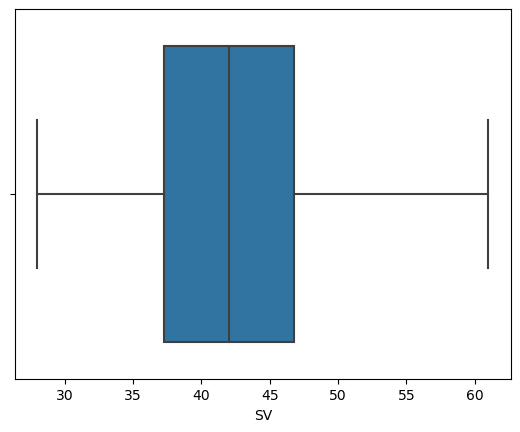

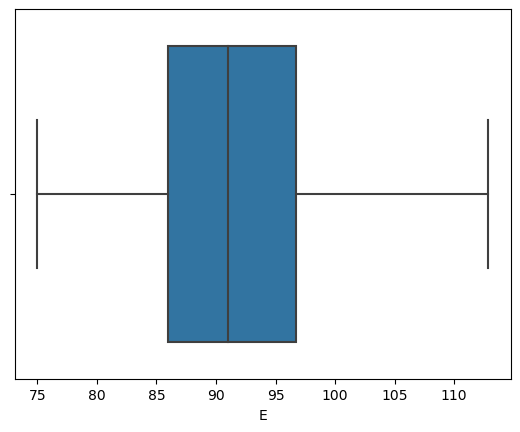

In [111]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [112]:
# outliers have been  removed.

In [113]:
v.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

In [114]:
# Skewness has been removed after handling outliers.

In [115]:
# Transformation

In [116]:
from sklearn.preprocessing import power_transform
transformed=power_transform(v)

In [117]:
transformed=pd.DataFrame(transformed)
transformed.columns=v.columns

In [118]:
transformed.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
ERA    0.001204
CG    -0.059785
SHO   -0.017889
SV     0.001270
E      0.032939
dtype: float64

In [119]:
transformed.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.502797,-0.359844,-0.827928,1.564693,-0.357505
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.261440,-0.359844,0.258244,0.361185,-0.560947
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.638366,1.993513,-0.272431,-0.611107,-1.355876
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.059785,1.220103,-0.546703,-0.767843,0.764697
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.528523,1.220103,0.258244,-1.097417,-0.560947


In [120]:
# skewness has been removed

In [121]:
# Standardization

In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(transformed)

In [123]:
# Seprating  independent and dependent features

In [124]:
X= scaled

In [125]:
Y=df['W']

In [126]:
X.shape

(30, 14)

In [127]:
Y.shape

(30,)

In [128]:
# Machine Learning Model

In [129]:
# Its a Regression problem because output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [152]:
x=df.iloc[:,1:18].values
y=df.iloc[:,0].values

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [154]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [155]:
def models(x_train,y_train):
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    
    #use SVC(linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)
    
    #use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)
    
    #use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)
    
    #use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
    print('[0]Logistic Regression training Accuracy:   ' , log.score(x_train,y_train))
    print('[1]KNeighbors training Accuracy:            ' , knn.score(x_train,y_train))
    print('[2]SVC(linear kernel) training Accuracy:    ' , svc_lin.score(x_train,y_train))
    print('[3]SVC (RBF kernel) training Accuracy:      ' , svc_rbf.score(x_train,y_train))
    print('[4]GaussianNB training Accuracy:            ' , gauss.score(x_train,y_train))
    print('[5]DecisionTreeClassifier training Accuracy:' , tree.score(x_train,y_train))
    print('[6]RandomForestClassifier training Accuracy:' , forest.score(x_train,y_train))
    
    return log, knn, svc_lin, svc_rbf ,gauss, tree ,forest

In [156]:
model=models(x_train,y_train)

[0]Logistic Regression training Accuracy:    1.0
[1]KNeighbors training Accuracy:             0.16666666666666666
[2]SVC(linear kernel) training Accuracy:     1.0
[3]SVC (RBF kernel) training Accuracy:       0.9166666666666666
[4]GaussianNB training Accuracy:             1.0
[5]DecisionTreeClassifier training Accuracy: 1.0
[6]RandomForestClassifier training Accuracy: 1.0


Most of the model have the accuracy of 100%